In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

In [19]:
os.getcwd()

'D:\\Study\\Internsala\\Spark Foudation Grip\\Task 3'

In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

# Classifier

In [14]:
random_state = 1234
dataset = pd.read_csv("iris.csv")
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target = "Species"
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(max_depth=4, random_state=1234)

## Initialize shadow tree

In [15]:
sk_dtree = ShadowSKDTree(tree_classifier, dataset[features], dataset[target], features, target, [0, 1])

## Visualization


#### viz leaf samples

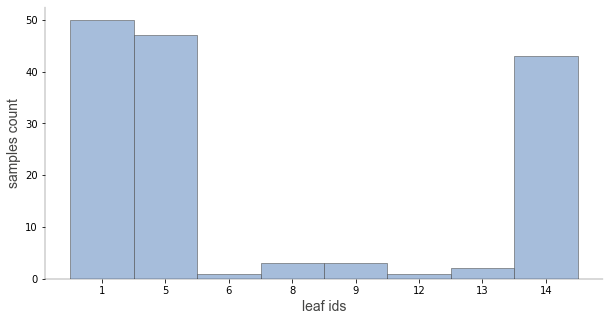

In [16]:
trees.viz_leaf_samples(tree_classifier, dataset[features], features)

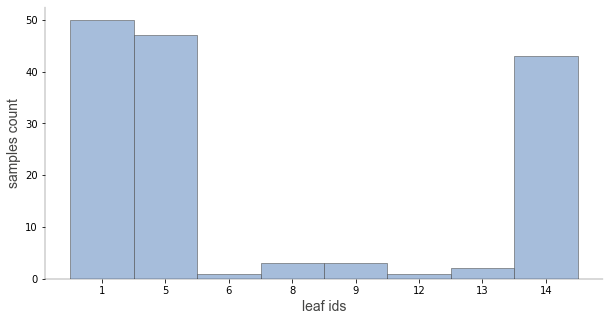

In [17]:
trees.viz_leaf_samples(sk_dtree)

In [24]:
trees.ctreeviz_leaf_samples(tree_classifier, dataset[features], dataset[target], features)

TypeError: 'DecisionTreeClassifier' object is not subscriptable

## dtreeviz

In [28]:
trees.dtreeviz(tree_classifier, dataset[features], dataset[target], features, target)

TypeError: 'NoneType' object is not subscriptable

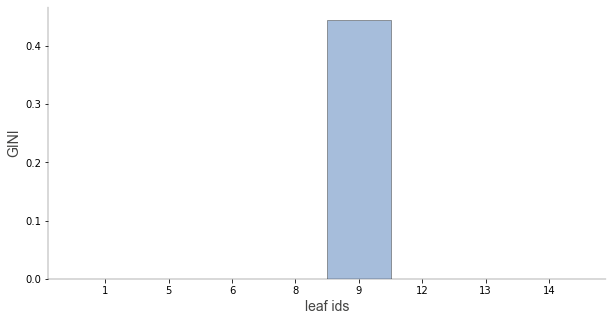

In [29]:
trees.viz_leaf_criterion(tree_classifier)

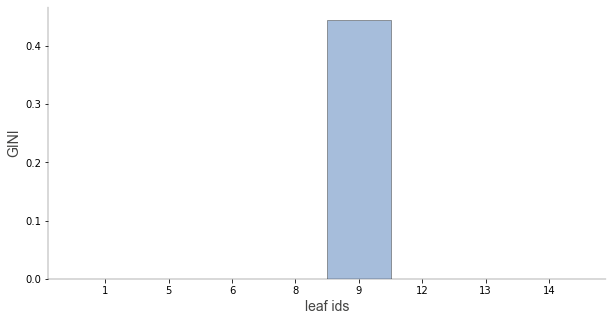

In [30]:
trees.viz_leaf_criterion(sk_dtree)

In [31]:
trees.describe_node_sample(tree_classifier, node_id=10, x_data=dataset[features], feature_names=features)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,46.000000,46.000000,46.000000,46.000000
mean,6.626087,3.017391,5.573913,2.073913
std,0.602379,0.300595,0.553548,0.231358
min,5.600000,2.500000,4.800000,1.800000
25%,6.300000,2.800000,5.100000,1.825000
50%,6.500000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [32]:

trees.describe_node_sample(sk_dtree, node_id=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,46.000000,46.000000,46.000000,46.000000
mean,6.626087,3.017391,5.573913,2.073913
std,0.602379,0.300595,0.553548,0.231358
min,5.600000,2.500000,4.800000,1.800000
25%,6.300000,2.800000,5.100000,1.825000
50%,6.500000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


### explain_prediction_path

In [38]:
X = dataset[features].iloc[100]
X

SepalLengthCm    6.3
SepalWidthCm     3.3
PetalLengthCm    6.0
PetalWidthCm     2.5
Name: 100, dtype: float64

In [39]:
print(trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english"))

4.85 <= PetalLengthCm 
1.75 <= PetalWidthCm 



<AxesSubplot:xlabel='features', ylabel='feature importance'>

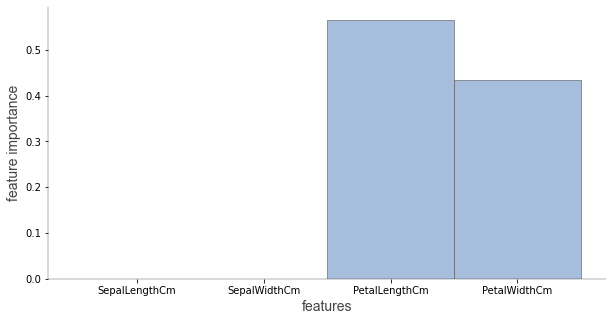

In [40]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")